In [32]:
from pyrosm import get_data, OSM

# Get test data 
fp = get_data("nordrhein-westfalen")
# fp = get_data("bochum")

# Initialize the reader
osm = OSM(fp)


Filter for traffic network

In [33]:
# Read traffic network with custom filter
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'public_transport': ["platform"]
                                        },
                                        filter_type="keep",

                                        keep_nodes=True, 
                                        keep_ways=True, 
                                        keep_relations=True
                                        )


Extract rail platforms and bus stops

In [57]:
from geopandas import GeoDataFrame

ways: GeoDataFrame = transit.loc[lambda x: x.osm_type == "way"]

coordinates = []
platforms = 0
busstops = 0

for way in ways.iloc:
    # Extract the point values that define the perimeter of the polygon
    if way["geometry"].geom_type == "LineString":
        coordinates.append(list(way["geometry"].coords.xy))
        busstops += 1
    elif way["geometry"].geom_type == "MultiLineString":
        for geom in way["geometry"].geoms:
            coordinates.append(list(geom.coords.xy))
        busstops += 1
    elif way["geometry"].geom_type == "Polygon":
        coordinates.append(list(way["geometry"].exterior.coords.xy))
        platforms += 1
    else:
        raise Exception("Unknown geometry type: " + way["geometry"].geom_type)
        
print("platforms: " + str(platforms))
print("busstops: " + str(busstops))


platforms: 5153
busstops: 20453


Extract routes

In [54]:
route_data = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': ["bus", "trolleybus", "minibus", "share_taxi", "train", "light_rail", "subway", "tram", "monorail", "ferry", "funicular"],
                                        },
                                        filter_type="keep",

                                        keep_nodes=True, 
                                        keep_ways=True, 
                                        keep_relations=True
                                        )

len(route_data)


11185

<Axes: >

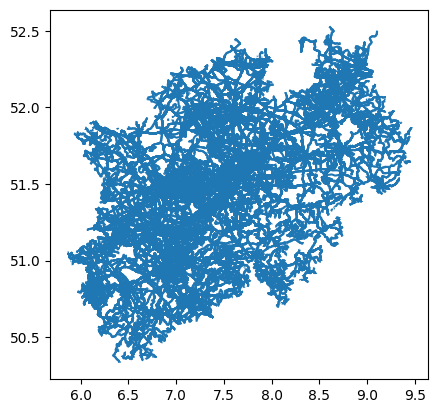

In [55]:

# for entry in route_data.iloc:
    # print(str(entry.id) + ": " + str(entry["from"]) + " -> " + str(entry["to"]))
    # if entry.id == 4051602899:
        # GeoDataFrame(geometry=[entry["geometry"]]).plot()

route_data.plot()
